In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans



In [284]:
data = pd.read_csv('data/data_eda.csv')

In [285]:
data.dtypes

Unnamed: 0                         int64
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_type                      object
payment_value                    float64
review_id                         object
review_score                       int64
product_weight_g                   int64
product_length_cm                  int64
product_height_cm                  int64
product_width_cm                   int64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city   

Drop the features that aren't important for the kmeans algorithm

In [286]:
data = data.drop(columns=['Unnamed: 0', 'order_id', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                          'order_item_id', 'product_id', 'shipping_limit_date', 'freight_value', 'product_weight_g', 'product_length_cm',
                          'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'seller_zip_code_prefix',
                          'seller_city', 'seller_state', 'order_estimated_delivery_date', 'seller_id', 'review_id', 'product_height_cm',
                          'product_width_cm', 'customer_unique_id'])

In [287]:
data.columns

Index(['order_status', 'price', 'payment_type', 'payment_value',
       'review_score', 'product_category_name_english'],
      dtype='object')

In [288]:
data.dtypes

order_status                      object
price                            float64
payment_type                      object
payment_value                    float64
review_score                       int64
product_category_name_english     object
dtype: object

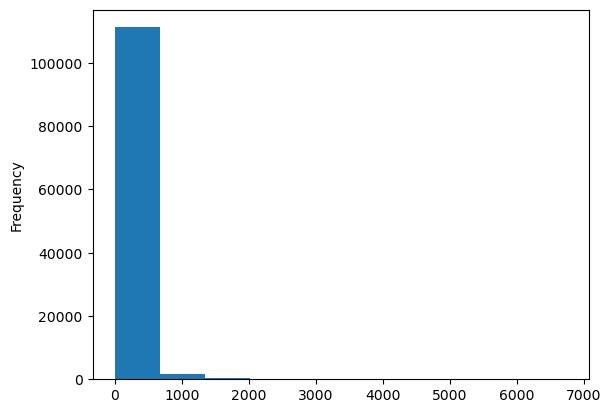

In [289]:
data['price'].plot(kind='hist')
plt.show()

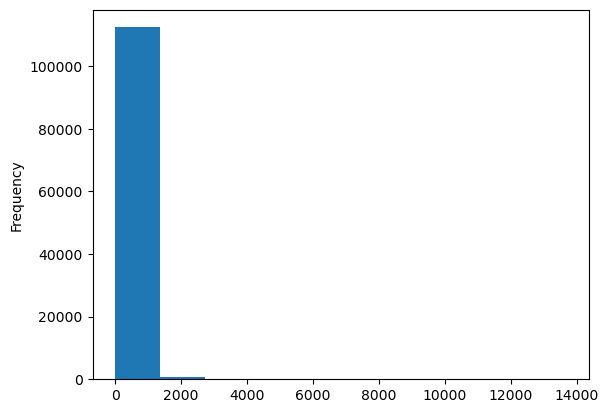

In [290]:
data['payment_value'].plot(kind='hist')
plt.show()

<AxesSubplot:ylabel='Frequency'>

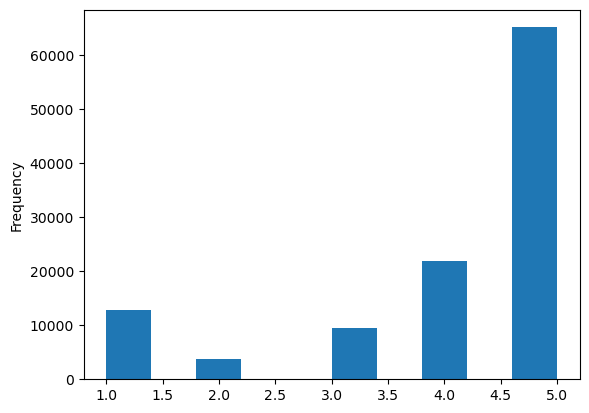

In [291]:
data['review_score'].plot(kind='hist')

scale the float columns. review score isn't a good idea to scale.

In [292]:
float_columns = data.select_dtypes(include=['float64'])

scaler = StandardScaler()
scaled_float_columns = scaler.fit_transform(float_columns)
data[float_columns.columns] = scaled_float_columns

checking if the scaling worked. Worked great.

In [293]:
data.head()

,order_status,price,payment_type,payment_value,review_score,product_category_name_english
0,delivered,-0.496247,credit_card,-0.580789,4,housewares
1,delivered,-0.496247,voucher,-0.641808,4,housewares
2,delivered,-0.496247,voucher,-0.579010,4,housewares
3,delivered,-0.496247,credit_card,-0.506409,4,housewares
4,delivered,-0.496247,credit_card,-0.506409,5,housewares


The review score column is an integer column. However in this context the column is a ordinal value (1 is the worst and 5 the best) so the StandardScaler is not a good choice since standardscaling is better for continious values. So the best way to combat this is to use the OrdinalEncoder for the review score column.

In [294]:
ordinal_encoder = OrdinalEncoder()
data['review_score_encoded'] = ordinal_encoder.fit_transform(data[['review_score']])
data['review_score_encoded'] = data['review_score_encoded'].astype(np.int)
data.drop(columns=['review_score'], inplace=True)
data.head()

/var/folders/81/wxtkyvxj48525r941w1fdxcm0000gn/T/ipykernel_74607/3047511367.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['review_score_encoded'] = data['review_score_encoded'].astype(np.int)


,order_status,price,payment_type,payment_value,product_category_name_english,review_score_encoded
0,delivered,-0.496247,credit_card,-0.580789,housewares,3
1,delivered,-0.496247,voucher,-0.641808,housewares,3
2,delivered,-0.496247,voucher,-0.579010,housewares,3
3,delivered,-0.496247,credit_card,-0.506409,housewares,3
4,delivered,-0.496247,credit_card,-0.506409,housewares,4


In [295]:
data.dtypes

order_status                      object
price                            float64
payment_type                      object
payment_value                    float64
product_category_name_english     object
review_score_encoded               int64
dtype: object

Use onehotencoder on the categorical values

In [296]:
categorical_values = data.select_dtypes(include=['object'])
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_categories = one_hot_encoder.fit_transform(categorical_values)
encoded_categories = pd.DataFrame(encoded_categories, columns=one_hot_encoder.get_feature_names(categorical_values.columns))
encoded_categories.head()

data = data.drop(columns=categorical_values.columns)
data = pd.concat([data, encoded_categories], axis=1)
data.head()
                                  

/Users/timovanderhorst/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,price,payment_value,review_score_encoded,order_status_canceled,order_status_delivered,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,product_category_name_english_agro_industry_and_commerce,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,-0.496247,-0.580789,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.496247,-0.641808,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.496247,-0.579010,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.496247,-0.506409,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.496247,-0.506409,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
data.dtypes

price                                                   float64
payment_value                                           float64
review_score_encoded                                      int64
order_status_canceled                                   float64
order_status_delivered                                  float64
                                                         ...   
product_category_name_english_stationery                float64
product_category_name_english_tablets_printing_image    float64
product_category_name_english_telephony                 float64
product_category_name_english_toys                      float64
product_category_name_english_watches_gifts             float64
Length: 78, dtype: object

Lets finally use Kmeans clustering with the elbow method to find the best number of clusters

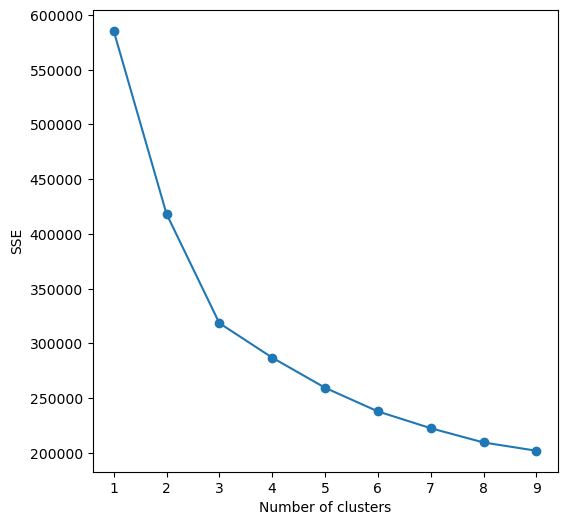

In [298]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('SSE')
plt.show()

Looks like the elbow starts at 3 so 3 clusters looks like an optimal amount of clusters.

In [299]:
kmeans = KMeans(n_clusters=3, random_state=0)  
kmeans.fit(data)

labels = kmeans.labels_

data['Cluster'] = labels

data.head()

,price,payment_value,review_score_encoded,order_status_canceled,order_status_delivered,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,product_category_name_english_agro_industry_and_commerce,...,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts,Cluster
0,-0.496247,-0.580789,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.496247,-0.641808,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.496247,-0.579010,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.496247,-0.506409,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.496247,-0.506409,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


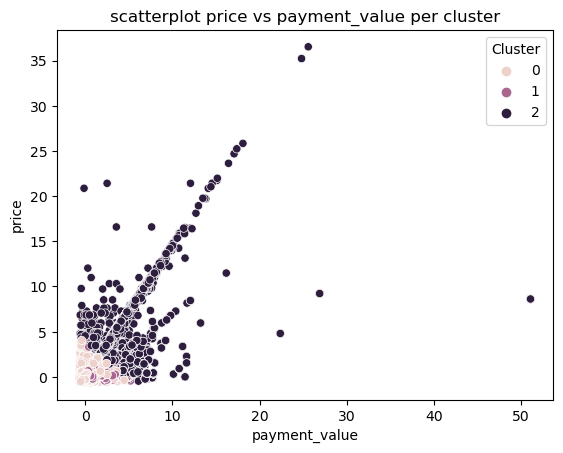

In [300]:
sns.scatterplot(data=data, x='payment_value', y='price', hue='Cluster')
plt.title('scatterplot price vs payment_value per cluster')
plt.show()

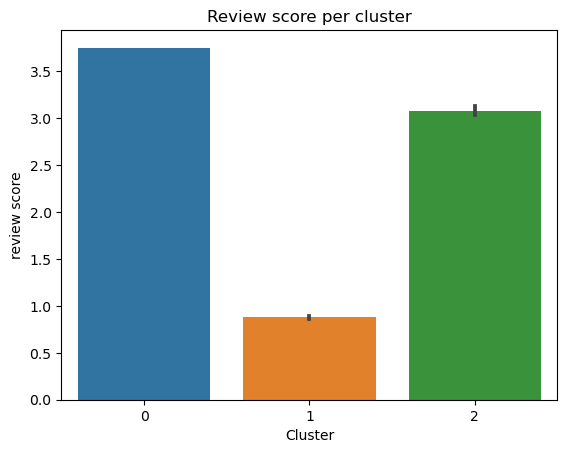

In [301]:
sns.barplot(data=data, x='Cluster', y='review_score_encoded')
plt.title('Review score per cluster')
plt.ylabel('review score')
plt.show()

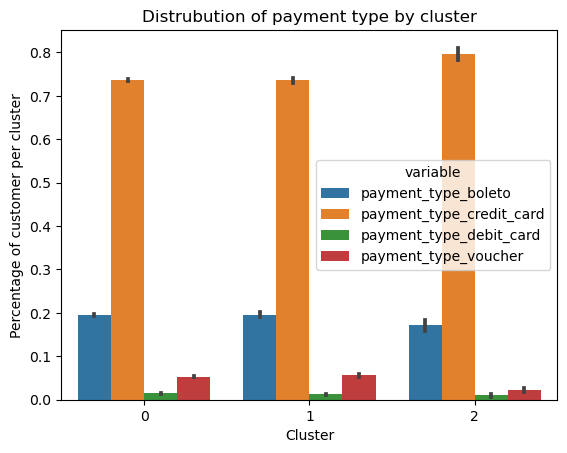

In [302]:
melted_data = data.melt(id_vars='Cluster', value_vars=['payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher'])
sns.barplot(data=melted_data, x='Cluster', y='value', hue='variable')
plt.title('Distrubution of payment type by cluster')
plt.ylabel('Percentage of customer per cluster')
plt.show()

In [303]:
data[data['Cluster'] == 1]['review_score_encoded'].value_counts()

0    12480
2     9324
1     3762
Name: review_score_encoded, dtype: int64

Looking into the clusters shows some interesting insights. Cluster 1 doesn't spend much money but more than cluster 0. Let's say they are the middle class customers. However with an average of around 1,75 (round up to 2, remember we did OrdinalEncoder on this column. So 0 is the same as giving a 1 review) they are the least sattisfied with their buy. Also on all the clusters the credit card is the prefered payment type.  What I would recommend for the marketing team is to look into why cluster 1 gives a bad review score. You can do this by looking into the open answer column. Also we could do a further reasearch in which clusters has a favourite category to buy. The marketing team could also use this information for targeting marketing.